In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import documents as docs
import textcomparisons as tc
import random
import time
import json
from collections import Counter

def readArticles(path):
    """ Reads df of articles from the given path, and adds a column
    to store the Document-processed article """
    article_df = pd.read_csv(path)
    article_df["doc"] = None
    return article_df

def dict_by_ids(df, ids):
    """ Given a dataframe of articles and a list of article ids, 
    returns a dictionary with ids as keys and Documents as items, 
    computing and storing the Documents back in the df as needed
    """
    doc_dict = {}
    for doc_id in ids:
        row = df["id"] == doc_id
        doc = df.loc[row, "doc"].iloc[0]
        if doc is None:
            doc = docs.Document(df.loc[row, "text"].iloc[0], clean = False)
            df.loc[row, "doc"] = doc
        doc_dict[doc_id] = doc
    return doc_dict

data_folder = "data"
article_files = ["articles2019-05-31_0-7000.csv",
                 "articles2019-05-31_7000-14000.csv",
                 "articles2019-05-31_14000-16654.csv"]
article_df = [readArticles(os.path.join(data_folder, file)) for file in article_files]

article_df = pd.concat(article_df)
article_df = article_df.reset_index()

# events = [event for event in np.unique(article_df["event"]) if not np.isnan(event)]
event_path = os.path.join(data_folder, "eventDict2019-05-31.json")
with open(event_path, encoding = "utf8") as json_file:
    events = json.load(json_file)
print(events.keys())
article_df.head(3)

dict_keys(['singletons', 'incompleteFingerprints', 'algoGroups', 'events', 'wordDict', 'entityDict'])


,index,id,publisher,scrape_time,on_homepage,url,title,text,fingerprint,event,doc
0,0,0,sfgate.com,2019-05-31T07:45:29-04:00,False,https://www.sfgate.com/news/article/Beto-O-Rou...,"Beto O'Rourke bolstering Iowa staff, field off...","Beto O'Rourke bolstering Iowa staff, field off...","{'wordCounts': {'31293': 2, '38276': 5, '15430...",NaN,None
1,1,1,centurylink.net/news,2019-05-31T11:36:56-04:00,True,https://centurylink.net/news/read/category/new...,Robbins Geller Rudman & Dowd LLP Announces Pro...,TO: ### ALL PERSONS WHO PURCHASED DIPLOMAT PHA...,"{'wordCounts': {'744': 3, '421': 3, '13018': 5...",NaN,None
2,2,2,news.google.com,2019-05-31T15:32:23-04:00,True,https://news.google.com/stories/CAAqOQgKIjNDQk...,NaN,iMoreverified_user ### iMore ### From buying u...,"{'wordCounts': {'710161': 1, '403001': 1, '226...",NaN,None


In [2]:
N = len(article_df)
N_top50 = np.sum(1 - np.isnan(article_df["event"]))
print("Number of singletons: %d" % len(events['singletons']))
print("Number of articles clustered into top 50 events: %d/%d (.%d)" % (N_top50, N, round(N_top50/N, 2) * 100))

ac = tc.ArticleComparisons()

Number of singletons: 10683
Number of articles clustered into top 50 events: 4072/16654 (.24)


Text(0.5, 1.0, 'Number of sentences in 800 sample articles')

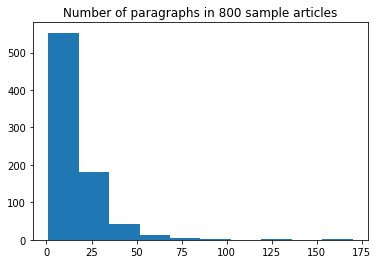

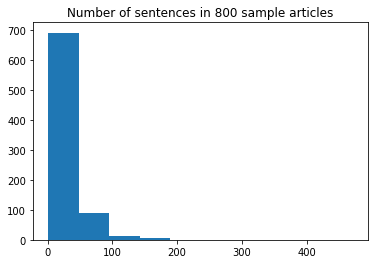

In [3]:
n = 800
sample = article_df.loc[random.sample(range(len(article_df)), n), "id"]
article_dict = dict_by_ids(article_df, sample)

n_paras = [len(article_dict[id].paragraphs) for id in article_dict.keys()]
n_sentences = [len(article_dict[id].get_sentences()) for id in article_dict.keys()]

plt.hist(n_paras)
plt.title("Number of paragraphs in %d sample articles" % n)

plt.figure()
plt.hist(n_sentences)
plt.title("Number of sentences in %d sample articles" % n)

(array([114., 163.,  97.,  67.,  77.,  54.,  32.,  43.,  25.,  20.,  30.,
         13.,  12.,  13.,   3.,   8.,   0.,   6.,   1.,   2.,   2.,   2.,
          2.,   0.,   1.,   1.,   2.,   1.,   1.,   0.,   0.,   2.,   0.,
          1.,   1.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([  1. ,   5.7,  10.4,  15.1,  19.8,  24.5,  29.2,  33.9,  38.6,
         43.3,  48. ,  52.7,  57.4,  62.1,  66.8,  71.5,  76.2,  80.9,
         85.6,  90.3,  95. ,  99.7, 104.4, 109.1, 113.8, 118.5, 123.2,
        127.9, 132.6, 137.3, 142. , 146.7, 151.4, 156.1, 160.8, 165.5,
        170.2, 174.9, 179.6, 184.3

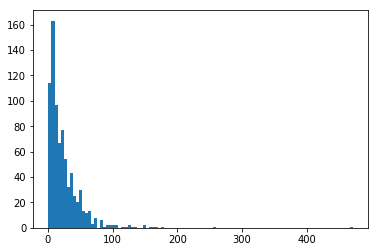

In [11]:
plt.hist(n_sentences, bins = 100)

In [29]:
short = np.where(np.array(n_sentences) < 10)[0]

shortdocs = [article_dict[list(article_dict.keys())[short[i]]] for i in range(len(short))]

In [118]:
for i in range(len(shortdocs)):
    print(list(article_dict.keys())[short[i]], n_paras[short[i]], n_sentences[short[i]], shortdocs[i].text, "\n")

1239 2 2 May 30, 2019 ### Former assistant Watergate prosecutor Jon Sale speaks out after Special Counsel Robert Mueller's statement on his investigation. ### What to Read Next 

14941 7 9 ORDER REPRINT → ### This photo taken on Thursday May 30, 2019 with a drone shows Pointe du Hoc, near Colleville-sur-Mer, Normandy. At the Pointe du Hoc, where Allied forces had to scale cliffs to silence Nazis guns, the limestone and clay cliffs have eroded but remains of the fortified location part of Germany's Atlantic Wall defensive system are a powerful vestige of WWII. David Vincent AP Photo ### SAINTE-MERE-EGLISE, France ### Seventy-five years ago, American paratrooper John Steele dangled from a clock tower in Sainte-Mere-Eglise after his parachute got caught during the D-Day invasion, and survived. ### Gunfire and shots have long ceased in the little town close to Utah Beach that is home to the Airborne Museum, but a mannequin and parachute still hang from the belfry to honor Steele and the Al

In [169]:
paywalls = [14941, 10762, 15618, 10029, 7666, 4182, 11832] # includes signup pages
clicknext = [14382, 3060]
maxsent = 9
maxpara = 7

# other: obituaries 

## Paywall examples
# ' Unlimited Digital Access: Only $0.99 For Your First Month', ' Get full access to The Charlotte Observer content across all your devices.'
# ' Become an FT Subscriber.', ' Join over 300,000 Finance professionals who already subscribe to the FT.', ' Choose the subscription that is right for you', ' Not sure which package to choose?', 'Try full access for 4 weeks', ' $1.00 for 4 weeks*', " For 4 weeks receive unlimited Premium digital access to the FT's trusted, award-winning business news"

# 14382: good article but scraped wrong, 2 para, 2 sent, avg. 115.5 len per sent
# 3060: same; 2 para, 2 sent, 152 len per sent

# good articles
# 8 sentences, 8 paragraphs, 100 average sentence length
# 7 para, 8 sentences, 128.5 average 
# 7 para, 8 sentences, 124 ave
# 5 para, 6 sentences, 94 avg
# 6 para, 7 sent, 103 avg
# 2 para, 3 sent, 162 avg
# 6 para, 7 sent, 105
# 7 para, 9 sent, 75 avg

229.5142857142857 1404


(array([19., 12.,  2.,  0.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([  52. ,  187.2,  322.4,  457.6,  592.8,  728. ,  863.2,  998.4,
        1133.6, 1268.8, 1404. ]),
 <a list of 10 Patch objects>)

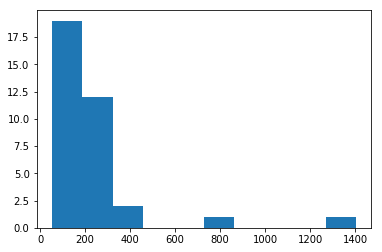

In [149]:
# either no article or video
badtext = [1239, 3123, 10859, 5964, 13167, 6207, 15623, 13016, 1056, 5337, 15090, 4826, 11752, 12937, 2596, 1471, 12010, 163, 
          8304, 1216, 14444, 8709, 282, 3378, 1429, 6813, 373, 12157, 7915, 29, 10000, 11219, 9384, 12090, 4787]
maxsent = 9
maxpara = 5
maxsentperpara = 3
maxavgsent = 74 #750
badtexts = [article_df.loc[i, "doc"].text for i in badtext]
lens = [len(text) for text in badtexts]
print(np.mean(lens), np.max(lens))
plt.hist(lens)

3510.9592337917484 61


{'whiskers': [<matplotlib.lines.Line2D at 0x21599aa3e10>,
 'caps': [<matplotlib.lines.Line2D at 0x21599a934e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21599aa39e8>],
 'medians': [<matplotlib.lines.Line2D at 0x21599a93b70>],
 'fliers': [<matplotlib.lines.Line2D at 0x21599a93eb8>],
 'means': []}

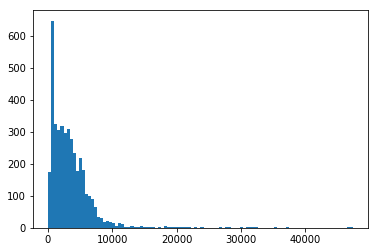

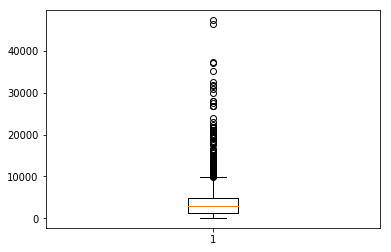

In [148]:
goodtext = np.where(1 - np.isnan(article_df["event"]))[0]
goodtexts = [article_df.loc[i, "text"] for i in goodtext]
glens = [len(text) for text in goodtexts]
print(np.mean(glens), np.min(glens))
plt.hist(glens, bins = 100)
plt.figure()
plt.boxplot(glens)

In [156]:
gshort = np.where(np.array(glens) < 500)[0]
[goodtexts[i] for i in gshort]

['share ### more_vert ### Pelosi introduced a new concept to the debate over President Donald Trump’s behavior: “Self-impeachable.” As Trump appears to be all but goading Democrats into impeachment proceedings, viewing the standoff as potentially politically valuable for his re-election campaign, Democrats are trying to impose restraint, preferring a more methodical approach and letting, as Pelosi says, Trump make the case himself by his stonewalling of Congress.J. Scott Applewhite',
 "CBS News Videos • ### May 30, 2019 ### China is threatening to restrict U.S. access to rare earth minerals, which are used in the development of many high-tech devices. Isaac Stone Fish, senior fellow at the Asia Society's Center on U.S.-China Relations, speaks to CBSN about the digital cold war developing between the two countries. ### What to Read Next",
 'CBS News Videos • ### May 31, 2019 ### For the first time ever, eight exceptional kids became co-champions after the Scripps National Spelling Bee r

In [164]:
gshort = np.where((np.array(glens) < 500) & (np.array(glens) > 400))[0]
[goodtexts[i] for i in gshort]
# the 5th percentile is 554 characters per article

['share ### more_vert ### Pelosi introduced a new concept to the debate over President Donald Trump’s behavior: “Self-impeachable.” As Trump appears to be all but goading Democrats into impeachment proceedings, viewing the standoff as potentially politically valuable for his re-election campaign, Democrats are trying to impose restraint, preferring a more methodical approach and letting, as Pelosi says, Trump make the case himself by his stonewalling of Congress.J. Scott Applewhite',
 "READ: Lawsuit against FBI over alleged gender discrimination at training academy ### Updated 4:58 PM ET, Thu May 30, 2019 ### Chat with us in Facebook Messenger. Find out what's happening in the world as it unfolds. ### More than a dozen women who attended the FBI's training academy are suing the law enforcement agency for what they say was a hostile work environment and sexual harassment, according to a new lawsuit. ### Read their lawsuit below:",
 'Email Bio Follow ### May 31 at 7:55 AM ### Here’s a li

In [193]:
bad_dict = dict_by_ids(article_df, paywalls + clicknext)
bad_word_dict = Counter()

for doc in bad_dict.keys():
    for sent in bad_dict[doc].get_bow_sentences():
        bad_word_dict.update(sent)

bad_word_dict.most_common(20) # "access", "subscrib"

[('the', 36),
 ('to', 27),
 ('for', 20),
 ('in', 15),
 ('you', 12),
 ('and', 11),
 ('of', 9),
 ('FT', 9),
 ('week', 9),
 ('access', 8),
 ('not', 7),
 ('are', 6),
 ('that', 6),
 ('subscrib', 6),
 ('choos', 6),
 ('have', 5),
 ('from', 5),
 ('is', 5),
 ('use', 5),
 ('as', 5)]

In [216]:
gshort = np.where(np.array(lens) < 500)[0]
glong = np.where(np.array(lens) > 500)[0]
short_dict = dict_by_ids(article_df, gshort)
long_dict = dict_by_ids(article_df, glong)

short_word_dict = Counter()
for doc in short_dict.keys():
    for sent in short_dict[doc].get_bow_sentences():
        short_word_dict.update(sent)

long_word_dict = Counter()
for doc in long_dict.keys():
    for sent in long_dict[doc].get_bow_sentences():
        long_word_dict.update(sent)

In [207]:
set(short_word_dict.most_common(10)) - set(long_word_dict.most_common(10))

{('and', 358),
 ('for', 137),
 ('in', 261),
 ('is', 141),
 ('it', 104),
 ('of', 337),
 ('on', 111),
 ('that', 125),
 ('the', 788),
 ('to', 350)}

In [209]:
short_word_dict.most_common(10)

[('the', 788),
 ('and', 358),
 ('to', 350),
 ('of', 337),
 ('in', 261),
 ('is', 141),
 ('for', 137),
 ('that', 125),
 ('on', 111),
 ('it', 104)]

In [220]:
short_keywords = [pair[0] for pair in short_word_dict.most_common(50)]
long_keywords = [pair[0] for pair in long_word_dict.most_common(50)]

[key for key in short_keywords if key not in long_keywords]

['wa',
 'be',
 'are',
 'but',
 'not',
 'or',
 'one',
 'you',
 'who',
 'hi',
 'said',
 'their',
 'he',
 'they',
 'all',
 'about',
 'we',
 'just',
 'first',
 'which',
 'when',
 'out',
 'trade',
 'two',
 'up',
 'get',
 'season']

In [245]:
[np.percentile(glens, i) for i in range(0, 100, 5)]

[61.0,
 554.0,
 768.0,
 877.0,
 1000.0,
 1294.75,
 1585.6,
 1904.3999999999996,
 2213.8,
 2515.9,
 2847.0,
 3115.05,
 3500.7999999999997,
 3833.15,
 4215.7,
 4752.5,
 5214.400000000001,
 5707.0,
 6641.700000000001,
 8200.249999999993]

In [115]:
artid = 12090
print(article_df.loc[artid, "url"])
print(article_df.loc[artid, "doc"])
print("Average sentence length: ", np.mean([len(sent) for sent in article_df.loc[artid, "doc"].get_sentences()]))

https://www.yardbarker.com/user_settings/favorites/s1_14419_25588802
 It's free and you can opt out at any time. For more information, please see our Privacy Policy . 
Average sentence length:  48.0


In [307]:
keywords = ["subscription", "subscribe", "full access", "digital access", "sign up", "unlimited access", "unlimited digital access", "log in", "sign up"]

def keywordsin(str):
    for word in keywords:
        if word in str:
            return True
    return False

article_df["paywall"] = 0
for i in range(len(article_df)):
    # Suspicious if article contains keywords
    text = article_df.loc[i, "text"].lower()
    if len(text) < 500:
        article_df.loc[i, "paywall"] += 0.5
    if len(text) < 1000 and keywordsin(text):
        article_df.loc[i, "paywall"] += 1
    doc = article_df.loc[i, "doc"]
    if doc is None:
        doc = docs.Document(text, clean = False)
        article_df.loc[i, "doc"] = doc
        
    

In [310]:
potential_paywalls = [doc for doc in article_df.loc[np.where(article_df["paywall"] >=  1)[0], "doc"]]

In [309]:
Counter(article_df["paywall"])
# 2144 articles are < 500 in len, ONLY
# 167 articles are < 1000 in len and have a keyword
# 351 articles are < 500 in len and have a keyword

Counter({0.0: 13992, 0.5: 2144, 1.0: 167, 1.5: 351})

In [311]:
[(len(doc.text), doc.text) for doc in potential_paywalls]

[(758,
  "Frequently Asked Questions ### What is Yardbarker?   ### How do I get started? ### Start reading and click on a headline! Yardbarker is free to use. ### What is the Morning Bark? ### The Morning Bark is Yardbarker's must-read, daily email newsletter.  Sign up for the Morning Bark. ### How do I report inappropriate content? ### We rely on the Yardbarker community to report inappropriate content.  Include the url of the article in your email. Please refer to our Terms of Service for more information. ### How do I contact Yardbarker? ### If you have questions, or concerns, please email us at feedback@yardbarker.com . For additional contact information, visit our Contact Us page. ### How can I get a job at Yardbarker?  ### Sports News, Rumors & Quizzes"),
 (417,
  "Log In ### Already signed up as a high school sports community reporter for NJ.com? ### You can use the same login that you use on our site for commenting. If you're having trouble logging in click here to contact our 

In [303]:
paywall_publishers = [pub for pub in article_df.loc[np.where(article_df["paywall"] >= 1)[0], "publisher"]]

In [304]:
Counter(paywall_publishers).most_common()
# WSJ: hard paywall; need to subscribe to read
# omaha: need to answer survey question to read (human check)
# charlotteobserver: hard paywall
# miamiherald: hard paywall
# ft: hard paywall
# dispatch

[('ft.com', 157),
 ('nj.com', 132),
 ('yardbarker.com', 55),
 ('miamiherald.com', 47),
 ('omaha.com', 45),
 ('charlotteobserver.com', 31),
 ('dallasnews.com', 6),
 ('dispatch.com', 4),
 ('wsj.com', 3),
 ('newsday.com', 3),
 ('beforeitsnews.com', 3),
 ('slate.com', 2),
 ('newsmax.com', 2),
 ('dailymail.co.uk', 2),
 ('breitbart.com', 2),
 ('sandiegouniontribune.com', 2),
 ('startribune.com', 2),
 ('bostonherald.com', 2),
 ('politico.com', 2),
 ('cnet.com', 1),
 ('kotaku.com', 1),
 ('today.com', 1),
 ('sfgate.com', 1),
 ('azcentral.com', 1),
 ('philly.com', 1),
 ('suntimes.com', 1),
 ('bangordailynews.com', 1),
 ('chicagotribune.com', 1),
 ('syracuse.com', 1),
 ('seattletimes.com', 1),
 ('nytimes.com', 1),
 ('bbc.co.uk', 1),
 ('seekingalpha.com', 1),
 ('theblaze.com', 1),
 ('dailycaller.com', 1)]

In [266]:
lens = [len(text) for text in article_df.loc[np.where(article_df["publisher"] == "nytimes.com")[0], "text"]] 
texts = [text for text in article_df.loc[np.where(article_df["publisher"] == "nytimes.com")[0], "text"]] 
np.array(texts)[np.where(np.array(lens) < 500)[0]]

array(['11 weeks on the list ### THE WOMAN IN THE WINDOW ### by A.J.  ### Buy ### 3 weeks on the list ### THE DEATH OF MRS. WESTAWAY ### by Ruth Ware ### Scout ### A tarot card reader mistakenly receives an inheritance letter and attends the funeral of the deceased. ### Buy ### 50 weeks on the list ### ELEANOR OLIPHANT IS COMPLETELY FINE ### by Gail Honeyman ### A young woman’s well-ordered life is disrupted by the I.T. guy from her office. ### Buy',
       'May 31, 2019 ### Note: This is our last Picture Prompt of the 2018-19 school year. ### What are the weirdest, most interesting or most surprising things you’ve seen on public transportation? Did they shock you, annoy you or bring you joy? ### Tell us in the comments, then read the related article to see more of the oddities New Yorkers regularly encounter on the subway. ### Find many more ways to use our Picture Prompt feature in this lesson plan . ### Advertisement',
       '1One driving a cross-country camper van ### 5Driverless 

In [265]:
np.where(np.array(lens) < 500)[0]

array([ 59, 151, 162, 211, 218, 267, 287, 291], dtype=int64)